#### Benchmarking

In [1]:
n = 100000

In [3]:
%timeit sum([1.0 / i**2 for i in range(1, n)])

10 loops, best of 3: 86.5 ms per loop


In [4]:
%%timeit
s = 0
for i in range(1, n):
    s += 1.0 / i ** 2

10 loops, best of 3: 82.5 ms per loop


In [6]:
!conda install numpy -y -q

Fetching package metadata: ....
Solving package specifications: ..............
Package plan for installation in environment /Users/your/anaconda/envs/101:

The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    numpy-1.10.2               |           py35_0         2.6 MB

The following NEW packages will be INSTALLED:

    numpy: 1.10.2-py35_0



In [7]:
import numpy as np

In [8]:
%timeit np.sum(1.0 / np.arange(1, n) ** 2)

The slowest run took 4.55 times longer than the fastest. This could mean that an intermediate result is being cached 
1000 loops, best of 3: 937 µs per loop


#### Profiling

In [1]:
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

/Users/your/anaconda/envs/101/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/your/anaconda/envs/101/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/your/anaconda/envs/101/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
def step(*shape):
    # random n-vector with +1 or -1
    return 2 * (np.random.random_sample(shape) < 0.5) - 1

In [5]:
%%prun -s cumulative -q -l 10 -T prun0
n = 10000
iterations = 50
x = np.cumsum(step(iterations, n), axis=0)
bins = np.arange(-30, 30, 1)
y = np.vstack([np.histogram(x[i, :], bins)[0] for i in range(iterations)])

 
*** Profile printout saved to text file 'prun0'. 


In [6]:
print(open('prun0', 'r').read())

         3262 function calls in 0.084 seconds

   Ordered by: cumulative time
   List reduced from 40 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.084    0.084 {built-in method builtins.exec}
        1    0.000    0.000    0.084    0.084 <string>:2(<module>)
        1    0.000    0.000    0.038    0.038 <string>:6(<listcomp>)
       50    0.014    0.000    0.038    0.001 function_base.py:78(histogram)
        1    0.000    0.000    0.027    0.027 fromnumeric.py:2038(cumsum)
        1    0.027    0.027    0.027    0.027 {method 'cumsum' of 'numpy.ndarray' objects}
        1    0.008    0.008    0.018    0.018 <ipython-input-2-da990d106d26>:1(step)
       50    0.000    0.000    0.018    0.000 fromnumeric.py:712(sort)
       50    0.016    0.000    0.016    0.000 {method 'sort' of 'numpy.ndarray' objects}
        1    0.011    0.011    0.011    0.011 {method 'random_sample' of 'mtrand.RandomState' 

In [8]:
%%writefile myscript.py
import numpy as np
import matplotlib as plt
import seaborn as sns

def step(*shape):
    # random n-vector with +1 or -1
    return 2 * (np.random.random_sample(shape) < 0.5) - 1

n = 10000
iterations = 50
x = np.cumsum(step(iterations, n), axis=0)
bins = np.arange(-30, 30, 1)
y = np.vstack([np.histogram(x[i, :], bins)[0] for i in range(iterations)])


Overwriting myscript.py


In [9]:
!python -m cProfile -o profresults myscript.py

/Users/your/anaconda/envs/101/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [10]:
# use pstats to analyze results
import pstats

In [11]:
p = pstats.Stats('profresults')
p.strip_dirs().sort_stats('cumulative').print_stats()

Tue Jan 26 16:15:07 2016    profresults

         568672 function calls (556343 primitive calls) in 7.222 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    823/1    0.099    0.000    7.227    7.227 {built-in method builtins.exec}
        1    0.000    0.000    7.227    7.227 myscript.py:1(<module>)
    848/3    0.012    0.000    7.139    2.380 <frozen importlib._bootstrap>:966(_find_and_load)
    848/3    0.009    0.000    7.139    2.380 <frozen importlib._bootstrap>:939(_find_and_load_unlocked)
       25    0.001    0.000    7.138    0.286 __init__.py:1(<module>)
    658/3    0.008    0.000    7.137    2.379 <frozen importlib._bootstrap>:659(_load_unlocked)
    532/3    0.005    0.000    7.137    2.379 <frozen importlib._bootstrap_external>:656(exec_module)
    928/3    0.002    0.000    7.117    2.372 <frozen importlib._bootstrap>:214(_call_with_frames_removed)
   501/27    0.003    0.000    6.639    0.246 {built-in m

#### Line profiler

In [12]:
!conda install line_profiler -q -y

Fetching package metadata: ....
Solving package specifications: .............
Package plan for installation in environment /Users/your/anaconda/envs/101:

The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    line_profiler-1.0          |           py35_0          37 KB

The following NEW packages will be INSTALLED:

    line_profiler: 1.0-py35_0



In [13]:
import numpy as np

In [14]:
%load_ext line_profiler

In [15]:
%%writefile simulation.py
import numpy as np

def step(*shape):
    return 2 * np.random.random_sample(shape) - 1

def simulate(iterations, n=10000):
    s = step(iterations, n)
    x = np.cumsum(s, axis=0)
    bins = np.arange(-30, 30, 1)
    y = np.vstack([np.histogram(x[i, :], bins)[0] for i in range(iterations)])
    return y

Writing simulation.py


In [16]:
import simulation

In [20]:
%lprun -T lprof0 -f simulation.simulate simulation.simulate(500)


*** Profile printout saved to text file 'lprof0'. 


In [21]:
print(open('lprof0').read())

Timer unit: 1e-06 s

Total time: 0.967988 s
File: /Users/your/apps/101/books/IPython_Interactive_Computing_and_Visualization_Cookbook/simulation.py
Function: simulate at line 6

Line #      Hits         Time  Per Hit   % Time  Line Contents
     6                                           def simulate(iterations, n=10000):
     7         1       267295 267295.0     27.6      s = step(iterations, n)
     8         1       140095 140095.0     14.5      x = np.cumsum(s, axis=0)
     9         1           26     26.0      0.0      bins = np.arange(-30, 30, 1)
    10         1       560570 560570.0     57.9      y = np.vstack([np.histogram(x[i, :], bins)[0] for i in range(iterations)])
    11         1            2      2.0      0.0      return y


In [26]:
%%writefile kernprof.py

#!/usr/bin/env python
# -*- coding: UTF-8 -*-
""" Script to conveniently run profilers on code in a variety of circumstances.
"""

import functools
import optparse
import os
import sys

PY3 = sys.version_info[0] == 3

# Guard the import of cProfile such that 3.x people
# without lsprof can still use this script.
try:
    from cProfile import Profile
except ImportError:
    try:
        from lsprof import Profile
    except ImportError:
        from profile import Profile


# Python 3.x compatibility utils: execfile
# ========================================
try:
    execfile
except NameError:
    # Python 3.x doesn't have 'execfile' builtin
    import builtins
    exec_ = getattr(builtins, "exec")

    def execfile(filename, globals=None, locals=None):
        with open(filename, 'rb') as f:
            exec_(compile(f.read(), filename, 'exec'), globals, locals)
# =====================================



CO_GENERATOR = 0x0020
def is_generator(f):
    """ Return True if a function is a generator.
    """
    isgen = (f.__code__.co_flags & CO_GENERATOR) != 0
    return isgen


class ContextualProfile(Profile):
    """ A subclass of Profile that adds a context manager for Python
    2.5 with: statements and a decorator.
    """

    def __init__(self, *args, **kwds):
        super(ContextualProfile, self).__init__(*args, **kwds)
        self.enable_count = 0

    def enable_by_count(self, subcalls=True, builtins=True):
        """ Enable the profiler if it hasn't been enabled before.
        """
        if self.enable_count == 0:
            self.enable(subcalls=subcalls, builtins=builtins)
        self.enable_count += 1

    def disable_by_count(self):
        """ Disable the profiler if the number of disable requests matches the
        number of enable requests.
        """
        if self.enable_count > 0:
            self.enable_count -= 1
            if self.enable_count == 0:
                self.disable()

    def __call__(self, func):
        """ Decorate a function to start the profiler on function entry and stop
        it on function exit.
        """
        # FIXME: refactor this into a utility function so that both it and
        # line_profiler can use it.
        if is_generator(func):
            wrapper = self.wrap_generator(func)
        else:
            wrapper = self.wrap_function(func)
        return wrapper

    # FIXME: refactor this stuff so that both LineProfiler and
    # ContextualProfile can use the same implementation.
    def wrap_generator(self, func):
        """ Wrap a generator to profile it.
        """
        @functools.wraps(func)
        def wrapper(*args, **kwds):
            g = func(*args, **kwds)
            # The first iterate will not be a .send()
            self.enable_by_count()
            try:
                item = next(g)
            finally:
                self.disable_by_count()
            input = (yield item)
            # But any following one might be.
            while True:
                self.enable_by_count()
                try:
                    item = g.send(input)
                finally:
                    self.disable_by_count()
                input = (yield item)
        return wrapper

    def wrap_function(self, func):
        """ Wrap a function to profile it.
        """
        @functools.wraps(func)
        def wrapper(*args, **kwds):
            self.enable_by_count()
            try:
                result = func(*args, **kwds)
            finally:
                self.disable_by_count()
            return result
        return wrapper

    def __enter__(self):
        self.enable_by_count()

    def __exit__(self, exc_type, exc_val, exc_tb):
        self.disable_by_count()


def find_script(script_name):
    """ Find the script.

    If the input is not a file, then $PATH will be searched.
    """
    if os.path.isfile(script_name):
        return script_name
    path = os.getenv('PATH', os.defpath).split(os.pathsep)
    for dir in path:
        if dir == '':
            continue
        fn = os.path.join(dir, script_name)
        if os.path.isfile(fn):
            return fn

    sys.stderr.write('Could not find script %s\n' % script_name)
    raise SystemExit(1)


def main(args=None):
    if args is None:
        args = sys.argv
    usage = "%prog [-s setupfile] [-o output_file_path] scriptfile [arg] ..."
    parser = optparse.OptionParser(usage=usage, version="%prog 1.0b2")
    parser.allow_interspersed_args = False
    parser.add_option('-l', '--line-by-line', action='store_true',
        help="Use the line-by-line profiler from the line_profiler module "
        "instead of Profile. Implies --builtin.")
    parser.add_option('-b', '--builtin', action='store_true',
        help="Put 'profile' in the builtins. Use 'profile.enable()' and "
            "'profile.disable()' in your code to turn it on and off, or "
            "'@profile' to decorate a single function, or 'with profile:' "
            "to profile a single section of code.")
    parser.add_option('-o', '--outfile', default=None,
        help="Save stats to <outfile>")
    parser.add_option('-s', '--setup', default=None,
        help="Code to execute before the code to profile")
    parser.add_option('-v', '--view', action='store_true',
        help="View the results of the profile in addition to saving it.")

    if not sys.argv[1:]:
        parser.print_usage()
        sys.exit(2)

    options, args = parser.parse_args()

    if not options.outfile:
        if options.line_by_line:
            extension = 'lprof'
        else:
            extension = 'prof'
        options.outfile = '%s.%s' % (os.path.basename(args[0]), extension)


    sys.argv[:] = args
    if options.setup is not None:
        # Run some setup code outside of the profiler. This is good for large
        # imports.
        setup_file = find_script(options.setup)
        __file__ = setup_file
        __name__ = '__main__'
        # Make sure the script's directory is on sys.path instead of just
        # kernprof.py's.
        sys.path.insert(0, os.path.dirname(setup_file))
        ns = locals()
        execfile(setup_file, ns, ns)

    if options.line_by_line:
        import line_profiler
        prof = line_profiler.LineProfiler()
        options.builtin = True
    else:
        prof = ContextualProfile()
    if options.builtin:
        if PY3:
            import builtins
        else:
            import __builtin__ as builtins
        builtins.__dict__['profile'] = prof

    script_file = find_script(sys.argv[0])
    __file__ = script_file
    __name__ = '__main__'
    # Make sure the script's directory is on sys.path instead of just
    # kernprof.py's.
    sys.path.insert(0, os.path.dirname(script_file))

    try:
        try:
            execfile_ = execfile
            ns = locals()
            if options.builtin:
                execfile(script_file, ns, ns)
            else:
                prof.runctx('execfile_(%r, globals())' % (script_file,), ns, ns)
        except (KeyboardInterrupt, SystemExit):
            pass
    finally:
        prof.dump_stats(options.outfile)
        print('Wrote profile results to %s' % options.outfile)
        if options.view:
            prof.print_stats()

if __name__ == '__main__':
    sys.exit(main(sys.argv))

Overwriting kernprof.py


In [41]:
%%writefile simulation_line_profile.py
import numpy as np

def step(*shape):
    return 2 * np.random.random_sample(shape) - 1

@profile
def simulate(iterations, n=10000):
    s = step(iterations, n)
    x = np.cumsum(s, axis=0)
    bins = np.arange(-30, 30, 1)
    y = np.vstack([np.histogram(x[i, :], bins)[0] for i in range(iterations)])
    return y

simulate(50)

Overwriting simulation_line_profile.py


In [42]:
!python -m kernprof -l -v simulation_line_profile.py > lprof.txt

In [43]:
print(open('lprof.txt').read())

Wrote profile results to simulation_line_profile.py.lprof
Timer unit: 1e-06 s

Total time: 0.079666 s
File: simulation_line_profile.py
Function: simulate at line 6

Line #      Hits         Time  Per Hit   % Time  Line Contents
     6                                           @profile
     7                                           def simulate(iterations, n=10000):
     8         1        20647  20647.0     25.9      s = step(iterations, n)
     9         1         4451   4451.0      5.6      x = np.cumsum(s, axis=0)
    10         1           52     52.0      0.1      bins = np.arange(-30, 30, 1)
    11         1        54513  54513.0     68.4      y = np.vstack([np.histogram(x[i, :], bins)[0] for i in range(iterations)])
    12         1            3      3.0      0.0      return y




#### Profiling memory usage

In [1]:
!conda install memory_profiler -y -q

Fetching package metadata: ....
Solving package specifications: ...............
Package plan for installation in environment /Users/your/anaconda/envs/101:

The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    psutil-3.4.1               |           py35_0         107 KB
    memory_profiler-0.40       |           py35_0          18 KB
    ------------------------------------------------------------
                                           Total:         125 KB

The following NEW packages will be INSTALLED:

    memory_profiler: 0.40-py35_0 
    psutil:          3.4.1-py35_0



In [2]:
import simulation

In [3]:
%load_ext memory_profiler

In [6]:
%mprun -T mprof0 -f simulation.simulate simulation.simulate(500)



*** Profile printout saved to text file mprof0. 


In [7]:
print(open('mprof0').read())

Filename: /Users/your/apps/101/books/IPython_Interactive_Computing_and_Visualization_Cookbook/simulation.py

Line #    Mem usage    Increment   Line Contents
     6     50.0 MiB      0.0 MiB   def simulate(iterations, n=10000):
     7    126.3 MiB     76.3 MiB       s = step(iterations, n)
     8    126.3 MiB      0.0 MiB       x = np.cumsum(s, axis=0)
     9    126.3 MiB      0.0 MiB       bins = np.arange(-30, 30, 1)
    10    126.5 MiB      0.2 MiB       y = np.vstack([np.histogram(x[i, :], bins)[0] for i in range(iterations)])
    11    126.5 MiB      0.0 MiB       return y


In [8]:
!python -m memory_profiler simulation_line_profile.py > mprof.txt

In [9]:
print(open('mprof.txt').read())

Filename: simulation_line_profile.py

Line #    Mem usage    Increment   Line Contents
     6   29.785 MiB    0.000 MiB   @profile
     7                             def simulate(iterations, n=10000):
     8   37.445 MiB    7.660 MiB       s = step(iterations, n)
     9   37.504 MiB    0.059 MiB       x = np.cumsum(s, axis=0)
    10   37.508 MiB    0.004 MiB       bins = np.arange(-30, 30, 1)
    11   37.785 MiB    0.277 MiB       y = np.vstack([np.histogram(x[i, :], bins)[0] for i in range(iterations)])
    12   37.785 MiB    0.000 MiB       return y





In [11]:
import numpy as np

In [12]:
%memit np.random.randn(1000, 1000)

peak memory: 134.15 MiB, increment: 7.66 MiB


#### avoid unnecessary array copy in numpy

In [16]:
def get_data_base(arr):
    base = arr
    while isinstance(base.base, np.ndarray):
        base = base.base
    return base
    
def data_is_shared(x, y):
    return get_data_base(x) is get_data_base(y)

In [17]:
# copies
a = np.arange(100)
print(data_is_shared(a, a.copy()))

False


In [18]:
print(data_is_shared(a, a[1:]))

True


In [19]:
# in-place operations
b = a
b *= 2
print(data_is_shared(a, b))

True


In [20]:
b = a
b = b * 2
print(data_is_shared(a, b))

False


In [21]:
# reshaping
a = np.zeros((10, 10))
b = a.reshape((1, -1))
c = a.T.reshape((1, -1))

In [22]:
print(data_is_shared(a, b))

True


In [23]:
print(data_is_shared(a, c))

False


In [24]:
# flatten and ravel
d = a.flatten()
e = a.ravel()

In [25]:
print(data_is_shared(a, d))

False


In [26]:
print(data_is_shared(a, e))

True


In [27]:
%timeit a.flatten()

The slowest run took 14.63 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 2.02 µs per loop


In [28]:
%timeit a.ravel()

The slowest run took 23.90 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 414 ns per loop


In [29]:
n = 1000
a = np.arange(n)
ac = a[:, np.newaxis]  # column
ar = a[np.newaxis, :]  # row

In [30]:
%timeit np.tile(ac, (1, n)) * np.tile(ar, (n, 1))

10 loops, best of 3: 26.8 ms per loop


In [31]:
%timeit ar * ac

100 loops, best of 3: 7.26 ms per loop


#### stride tricks

In [32]:
x = np.zeros(10)
x.strides

(8,)

In [33]:
x = np.zeros((10, 10))
x.strides

(80, 8)

In [35]:
# change or strides manually
# this is what broadcasting actually does
# same array, just change the way of reading it
# so no array copying happens
n = 1000
a = np.arange(n)
b = np.lib.stride_tricks.as_strided(a, (n, n), (0, 8))
b, b.size, b.shape, b.strides, b.nbytes

(array([[  0,   1,   2, ..., 997, 998, 999],
        [  0,   1,   2, ..., 997, 998, 999],
        [  0,   1,   2, ..., 997, 998, 999],
        ..., 
        [  0,   1,   2, ..., 997, 998, 999],
        [  0,   1,   2, ..., 997, 998, 999],
        [  0,   1,   2, ..., 997, 998, 999]]),
 1000000,
 (1000, 1000),
 (0, 8),
 8000000)

In [36]:
%timeit b * b.T

100 loops, best of 3: 7.87 ms per loop


In [37]:
%timeit np.tile(a, (n, 1)) * np.tile(a[:, np.newaxis], (1, n))

10 loops, best of 3: 24.3 ms per loop


#### Rolling average with strides trick

In [58]:
import numpy as np
from numpy.lib.stride_tricks import as_strided
n = 5
k = 2
a = np.linspace(1, n, n)

In [39]:
a

array([ 1.,  2.,  3.,  4.,  5.])

In [59]:
as_strided(a, (k, n - 1), (8, 8))

array([[ 1.,  2.,  3.,  4.],
       [ 2.,  3.,  4.,  5.]])

In [62]:
def shift1(x, k):
    return np.vstack([x[i:n-k+i+1] for i in range(k)])

def shift2(x, k):
    return as_strided(x, (k, n - 1), (x.itemsize, ) * 2)

In [43]:
b = shift1(a, k)
b

array([[ 1.,  2.,  3.,  4.],
       [ 2.,  3.,  4.,  5.]])

In [63]:
c = shift2(a, k)
c

array([[ 1.,  2.,  3.,  4.],
       [ 2.,  3.,  4.,  5.]])

In [64]:
%timeit shift1(x, k)

10000 loops, best of 3: 23.1 µs per loop


In [65]:
%timeit shift2(x, k)

10000 loops, best of 3: 28.1 µs per loop


In [67]:
n, k = 100, 10
t = np.linspace(0.0, 1.0, n)
x = t + 0.1 * np.random.randn(n)
y = shift2(x, k)
x_avg = y.mean(axis=0)

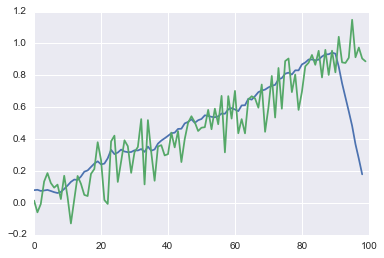

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.plot(x_avg)
plt.plot(x)

In [69]:
n, d = 100000, 100
a = np.random.random_sample((n, d))

In [70]:
b1 = a[::10]  # array view

In [71]:
b2 = a[np.arange(0, n, 10)]  # fancy selection

In [72]:
data_is_shared(a, b1), data_is_shared(a, b2)

(True, False)

In [73]:
%timeit b1 = a[::10]

The slowest run took 24.85 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 483 ns per loop


In [74]:
%timeit b2 = a[np.arange(0, n, 10)]

100 loops, best of 3: 8.4 ms per loop


In [75]:
i = np.arange(0, n, 10)

In [76]:
b1 = a[i]
b2 = np.take(a, i, axis=0)

In [77]:
np.array_equal(b1, b2)

True

In [78]:
%timeit a[i]

100 loops, best of 3: 8.52 ms per loop


In [79]:
%timeit np.take(a, i, axis=0)

100 loops, best of 3: 8.01 ms per loop


In [80]:
# boolean mask to select
i = np.random.random_sample(n) < 0.5

In [81]:
b1 = a[i]
b2 = np.compress(i, a, axis=0)

In [82]:
np.array_equal(b1, b2)

True

In [83]:
%timeit a[i]

10 loops, best of 3: 39.1 ms per loop


In [84]:
%timeit np.compress(i, a, axis=0)

10 loops, best of 3: 39.5 ms per loop


In [85]:
nrows, ncols = 1000000, 100
f = np.memmap('memmapped.dat', dtype=np.float32, mode='w+', shape=(nrows, ncols))

In [89]:
for i in range(ncols):
    f[:, i] = np.random.rand(nrows)

In [90]:
x = f[:, -1]
x

memmap([ 0.39526686,  0.46715385,  0.16953483, ...,  0.61905104,
        0.13727979,  0.11162017], dtype=float32)

In [92]:
del f

In [93]:
x

memmap([ 0.39526686,  0.46715385,  0.16953483, ...,  0.61905104,
        0.13727979,  0.11162017], dtype=float32)

In [95]:
f = np.memmap('memmapped.dat', dtype=np.float32, mode='w+', shape=(nrows, ncols))

In [96]:
np.array_equal(f[:, -1], x)

True

In [97]:
del f

#### pytables

In [99]:
!conda install pytables -y -q

Fetching package metadata: ....
Solving package specifications: ..................
Package plan for installation in environment /Users/your/anaconda/envs/101:

The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    numexpr-2.4.6              |      np110py35_0         105 KB

The following NEW packages will be INSTALLED:

    hdf5:     1.8.15.1-2       
    numexpr:  2.4.6-np110py35_0
    pytables: 3.2.2-np110py35_0



In [101]:
import numpy as np
import tables as tb

In [102]:
f = tb.open_file('myfile.h5', 'w')

In [103]:
f.create_group('/', 'experiment1')

/experiment1 (Group) ''
  children := []

In [104]:
f.set_node_attr('/experiment1', 'date', '2014-09-01')

In [105]:
x = np.random.rand(1000, 1000)
f.create_array('/experiment1', 'array1', x)

/experiment1/array1 (Array(1000, 1000)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None

In [106]:
f.close()

In [108]:
f = tb.open_file('myfile.h5', 'r')

In [110]:
f.get_node_attr('/experiment1', 'date')

'2014-09-01'

In [111]:
y = f.root.experiment1.array1

In [112]:
y

/experiment1/array1 (Array(1000, 1000)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None

In [113]:
np.array_equal(x, y)

True

In [114]:
f.get_node('/experiment1/array1')

/experiment1/array1 (Array(1000, 1000)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None

In [115]:
f.close()

#### tables in pytables

In [116]:
f = tb.open_file('test.h5', 'w')

In [117]:
dtype = np.dtype([('city', 'S64'), ('population', 'i4')])

In [118]:
table = f.create_table('/', 'table1', dtype)

In [119]:
table.append([('Brussels', 1138854), ('London', 8308369), ('Paris', 2243833)])

In [120]:
table.flush()

In [121]:
table[:]

array([(b'Brussels', 1138854), (b'London', 8308369), (b'Paris', 2243833)], 
      dtype=[('city', 'S64'), ('population', '<i4')])

In [122]:
table.col('city')

array([b'Brussels', b'London', b'Paris'], 
      dtype='|S64')

In [123]:
[row['city'] for row in table.where('population>2e6')]

[b'London', b'Paris']

In [124]:
table[1]

(b'London', 8308369)